# Title: Document Classification using NLP, Machine Learning

#### Group Member Names : Rahul Menaria (200555789) and Sayali Mane (200560393)



# Introduction:


### AIM
Perform document classification into four defined categories (World, Sports, Business, Sci/Tech). Compare the classifier accuracy with different models ranging from Naïve Bayes to Convolutional Neural Network (CNN). By making use of different feature engineering techniques and extra Natural Language Processing (NLP) features create an accurate text classifier.

### Document/Text Classification
Document/Text classification is an important task that has use cases in many real-world problems. Assigning topics to documents like news article, books, webpages, social media post has many applications like spam filtering, sentiment analysis, tagging customer queries, fake news detection etc. Natural language's vastly large size, unrestrictive nature, and ambiguity led to two problems when using standard parsing approaches that relied purely on symbolic, hand-crafted rules: unmanageable numerous rules and inability to understand ungrammatical text something which is human comprehensible easily. A problem statement apt for machine learning. NLP is a branch of data science that consists of systematic processes for analyzing, understanding, and deriving information from the text data in a smart and efficient manner. By utilizing NLP and its components, one can organize the massive chunks of text data, perform numerous automated tasks and solve a wide range of problems such as – automatic summarization, machine translation, named entity recognition, relationship extraction, sentiment analysis, speech recognition, and topic segmentation etc.

### Previous Research in this area
In the last few years, neural networks based on dense vector representations have been producing superior results on various NLP tasks. This trend is sparked by the success of word embeddings and deep learning methods. The traditional NLP systems which were formed upon machine learning rules have always relied majorly on hand-crafted features whereas deep learning has provided substantial difference with multi-level automatic feature representation learning. With time as the success of a simple deep learning framework was established over conventional machine learning methodologies, several NLP tasks have changed their focus on this new area. Not only complex deep learning based algorithm been proposed but applications such as semantic role labeling and named entity recognition have been improved greatly.  


*********************************************************************************************************************
#### Github Repo: 
https://github.com/saurabh1907/document-classification-ml-nlp
*********************************************************************************************************************
#### DESCRIPTION OF PAPER:
The paper "Deep Learning for Technical Document Classification" introduces a novel multimodal deep learning architecture, for accurately classifying technical documents. Unlike previous studies, this approach considers both text and image information within documents, as well as the relationships among documents. By combining convolutional, recurrent, and graph neural networks, the architecture achieves better classification accuracy, especially in hierarchical systems like the International Patent Classification. The method's potential to handle large volumes of multimodal documents offers significant benefits for knowledge management in technology companies.

*********************************************************************************************************************
#### SOLUTION:
* The method discussed in this study tackles the limitations of previous approaches by incorporating a broader range of machine learning models, including DNN, Naive Bayes, Decision Tree,XGBoost,MLP. These additional models bring diverse learning mechanisms and predictive capabilities, potentially capturing complex patterns and relationships in the data more effectively. Moreover, the inclusion of ensemble methods like MLP ,XGBoost leverages the power of multiple models to achieve higher accuracy and robustness. The use of deep learning techniques, such as DNN, enables better representation of data through multiple layers of abstraction, potentially leading to improved predictions. *

# Background



| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| S. Selvi and S. Indra Gandhi, "Text Classification Algorithms: A Survey," International Journal of Computer Science and Information Security, Vol. 9, No. 5, 2011. [1] | This survey provides an overview of various text classification algorithms, including traditional machine learning techniques and deep learning models.|  For this project, we utilize a dataset containing news articles labeled into categories such as politics, sports, technology, and entertainment |Further studies need to be performed in other locations to confirm the results and the data which was analyzed was reltively small. 
| Yoon Kim, "A Convolutional Neural Network for Modelling Sentences," arXiv preprint arXiv:1408.5882, 2014. [2] | This paper introduces the use of convolutional neural networks (CNNs) for text classification tasks, showcasing the effectiveness of CNNs in capturing local patterns in sentences.| A dataset of medical records categorized into different medical conditions. This dataset can be used for medical text classification tasks such as disease diagnosis.| Document classifiers trained on one domain may not perform well on documents from a different domain. Models may struggle with domain-specific jargon and terminology.


# Methodology
*********************************************************************************************************************

####
##### 1. Data Preparation and Preprocessing:
Curated diverse dataset of technical documents.
Cleaned text data by removing symbols and punctuation.
Applied tokenization to split text into words or n-grams.
##### 2. Feature Representation:
Explored different representations:
Count Vectors: Word frequency vectors.
WordLevel TF-IDF: Captured word importance.
N-Gram Vectors: Sequences of words for context.
CharLevel Vectors: Encoded characters for patterns.
##### 3. Model Selection and Evaluation:
Chose models: NB, LR, RF, XGB, MLP, CNN.
Utilized cross-validation for robustness.
Split data into training and testing subsets.
##### 4. Word Embedding:
Introduced word embeddings for semantic understanding.
Enhanced accuracy and reduced training time.
##### 5. Evaluation Metrics:
Primarily used accuracy.

In [1]:
import pandas, numpy, string, textblob
import pickle
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import xgboost
from keras import layers, models, optimizers
from keras.preprocessing import text, sequence
import matplotlib.pyplot as plt

2023-08-17 17:56:07.939598: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Dataset
The chosen dataset is the ‘AG News’ dataset consisting of 1,20,000 news articles for training categorized in four categories- World, Sports, Business, Sci/Tech. It also includes 7600 testing samples in csv format. I have used pandas library to load the dataset.

In [2]:
#Load training data
df_train = pandas.read_csv(r'/Users/rahul/Desktop/rm/project data/github_file/train.csv')
# df_train = df_train.truncate(after=10000)
#Load testing data
df_test = pandas.read_csv(r'/Users/rahul/Desktop/rm/project data/github_file/test.csv')

In [3]:
df_train.head()
df_train.info()
df_count = df_train.groupby(['Class Index'], as_index = False).agg({'Title': 'count', 'Description': 'count'})
df_count.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


,Class Index,Title,Description
0,1,30000,30000
1,2,30000,30000
2,3,30000,30000
3,4,30000,30000


### Text Pre-processing
It is predominantly comprised of three steps:
1. Tokenization – It is about splitting strings of text into smaller pieces, or “tokens”. Paragraphs can be tokenized into sentences and sentences can be tokenized into words. 
2. Noise Removal – I have further cleaned up the text in this step. I have achieved so by removing punctuations, stop words, extra whitespaces and many other data points which was irrelevant to the NLP tasks. The NLTK library has inbuild functionalities for many such operations. A brief description of few of the steps taken is as:
    - Removed HTML tags: Since articles scrapped from web are likely to contain HTML tags, therefore have used Python package BeautifulSoup to remove HTML tags.
    - Remove stop words, accented characters and punctuation: As stop words, punctuations, extra whitespaces and accented characters do not add useful information to our text processing algorithm, therefore have removed them using modules such as Unicode and spaCy.
    - Treating Numbers: In our application numbers do not provide any significant knowledge and so, we have removed them. Firstly, in order to standardize the text, have converted number words to numeric form and then removed them from the textual data.
3. Normalization – In this process, I have standardized the text into uniform sequence. I have converted the text to lowercase and using NLTK libraries performed stemming and lemmatization. Stemming refers to removing the suffixes attached to a word and lemmatization refers to conserving the root word of a word. We have used lemmatization for our textual data because that performed better with the pre-trained word embedding

In [4]:
import re, unidecode
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

# Needed only once
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text
def remove_accented_chars(text):
    text = unidecode.unidecode(text)
    return text
def remove_numbers(text): 
    result = re.sub(r'\d+', '', text) 
    return result
def remove_slash_with_space(text): 
    return text.replace('\\', " ")
def remove_punctuation(text): 
    translator = str.maketrans('', '', string.punctuation) 
    return text.translate(translator) 
def text_lowercase(text): 
    return text.lower()     
def remove_whitespace(text): 
    return  " ".join(text.split()) 
def remove_stopwords(text): 
    stop_words = set(stopwords.words("english")) 
    word_tokens = word_tokenize(text) 
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    return ' '.join(filtered_text)
def stem_words(text): 
    stemmer = PorterStemmer() 
    word_tokens = word_tokenize(text) 
    stems = [stemmer.stem(word) for word in word_tokens] 
    return ' '.join(stems)
def lemmatize_words(text): 
    lemmatizer = WordNetLemmatizer() 
    word_tokens = word_tokenize(text) 
    # provide context i.e. part-of-speech 
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return ' '.join(lemmas) 


In [5]:
print(df_test.columns)


Index(['Class Index', 'Title', 'Description'], dtype='object')


In [6]:
# Perform preprocessing
def perform_preprocessing(text):
    text = remove_html_tags(text)
    text = remove_accented_chars(text)
    text = remove_numbers(text)
    text = remove_stopwords(text)
    text = text_lowercase(text)
    text = remove_slash_with_space(text)
    text = remove_punctuation(text)
    # text = stem_words(text)
    text = lemmatize_words(text)
    text = remove_whitespace(text)
    return text

df_train['Title'] = df_train['Title'].apply(perform_preprocessing)
df_train['Description'] = df_train['Description'].apply(perform_preprocessing)
df_test['Title'] = df_test['Title'].apply(perform_preprocessing)
df_test['Description'] = df_test['Description'].apply(perform_preprocessing)


/Users/rahul/anaconda3/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


### Train test split

In [7]:
X_train = df_train['Description']
X_test = df_test['Description']
y_train = df_train['Class Index']
y_test = df_test['Class Index']

### Feature Engineering
Text files are actually series of words (ordered). In order to run machine learning algorithms we need to convert the text files into numerical feature vectors.  

We will implement the following different ideas in order to obtain relevant features from our dataset.

1. CountVectors – I have used scikit-learn library’s CountVectorizer module to vectorize sentences. It generates vocabulary for all unique words of sentence. From this count of words, a feature vector is created. This essentially is the Bag of Words BOW model. 

In [8]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(X_train)
X_train_count =  count_vect.transform(X_train)
X_test_count =  count_vect.transform(X_test)

2. TF-IDF Vectors Word level - Now in order to assign weightage to the above feature vector, we have used Term Frequency – Inverse Document Frequency logic. We have given a score to the words based on its Term Frequency (#words/ #Total words) and its Inverse Frequency, i.e. presence in each of the documents. It low scores repetitive words.

![title](images/tfidf.png)

In [9]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(X_train)
X_train_tfidf =  tfidf_vect.transform(X_train)
X_test_tfidf =  tfidf_vect.transform(X_test)

3. TF-IDF Vectors N-Gram level – In this approach for better results, have combined N (>= 2) words to form N-grams. Bigrams (N=2) are the most optimal and best convey most important information among other N-grams. 

In [10]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2), max_features=5000)
tfidf_vect_ngram.fit(X_train)
X_train_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
X_test_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

4. TF-IDF Vectors Character level- character level

In [11]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(X_train)
X_train_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
X_test_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test) 

/Users/rahul/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:558: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn(


5. Text / NLP based features - I tried adding additional NLP features namely word count, character count, average word density, title word count but I found them harmful to model accuracy. So, I have removed them. 

In [12]:
# label encode the target variable 
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

encoder = preprocessing.LabelBinarizer()
encoder.fit(y_train)
y_train_bi = encoder.transform(y_train)
y_test_bi = encoder.transform(y_test)

###	MODEL SELECTION AND TRAINING
#### Classical models (Used as a Baseline Model)

In [13]:
def train_model(classifier, X_train, y_train, X_test, y_test, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(X_train, y_train)
    # predict the labels on validation dataset
    predictions = classifier.predict(X_test)
    return metrics.accuracy_score(predictions, y_test)

Naïve Bayes Classifier – This classification technique is based on Bayes’ Theorem and assumes independence among the predictors

![title](images/nb.png)

NB, Count Vectors:  0.8956578947368421
NB, WordLevel TF-IDF:  0.8836842105263157
NB, N-Gram Vectors:  0.8797368421052632
NB, CharLevel Vectors:  0.8444736842105263


<BarContainer object of 4 artists>

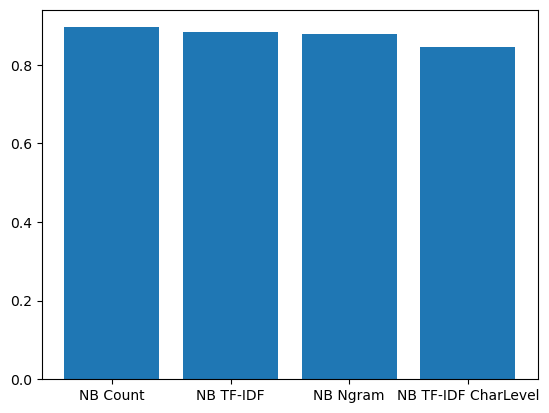

In [14]:
# Naive Bayes on Count Vectors
accuracy1 = train_model(naive_bayes.MultinomialNB(), X_train_count, y_train, X_test_count, y_test)
print("NB, Count Vectors: ", accuracy1)

# Naive Bayes on Word Level TF IDF Vectors
accuracy2 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("NB, WordLevel TF-IDF: ", accuracy2)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy3 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram, y_test)
print("NB, N-Gram Vectors: ", accuracy3)

# Naive Bayes on Character Level TF IDF Vectors
accuracy4 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars, y_test)
print("NB, CharLevel Vectors: ", accuracy4)

df = {'ModelType': ['NB Count', 'NB TF-IDF','NB Ngram', 'NB TF-IDF CharLevel' ], 'Accuracy': [accuracy1,accuracy2, accuracy3,accuracy4]}
df = pandas.DataFrame(df) #
plt.bar(df['ModelType'], df['Accuracy'])

Logistic Regression – This model uses a logistic/sigmoid function to calculate the probabilities of different values of the categorical dependent variable in presence of one or more predictors. Logit function is an estimation of log of odds in the favor of event and outputs a s-shaped curve with probability estimates.


/Users/rahul/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR, Count Vectors:  0.8997368421052632


/Users/rahul/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR, WordLevel TF-IDF:  0.8986842105263158


/Users/rahul/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR, N-Gram Vectors:  0.8969736842105264
LR, CharLevel Vectors:  0.8838157894736842


/Users/rahul/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<BarContainer object of 4 artists>

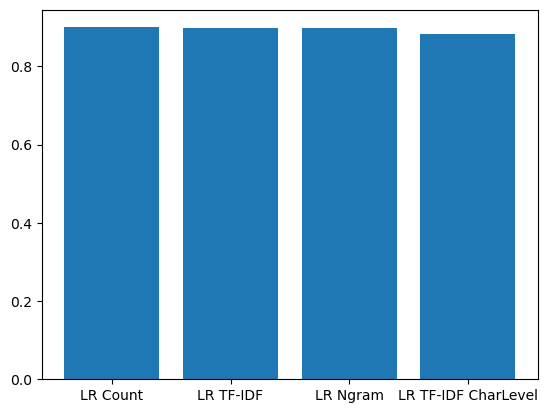

In [15]:
# Logistic Regression on Count Vectors
accuracy1 = train_model(linear_model.LogisticRegression(), X_train_count, y_train, X_test_count, y_test)
print("LR, Count Vectors: ", accuracy1)

# Logistic Regression on Word Level TF IDF Vectors
accuracy2 = train_model(linear_model.LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR, WordLevel TF-IDF: ", accuracy2)

# Logistic Regression on Ngram Level TF IDF Vectors
accuracy3 = train_model(linear_model.LogisticRegression(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram, y_test)
print("LR, N-Gram Vectors: ", accuracy3)

# Logistic Regression on Character Level TF IDF Vectors
accuracy4 = train_model(linear_model.LogisticRegression(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars, y_test)
print("LR, CharLevel Vectors: ", accuracy4)

df = {'ModelType': ['LR Count', 'LR TF-IDF','LR Ngram', 'LR TF-IDF CharLevel' ], 'Accuracy': [accuracy1,accuracy2, accuracy3,accuracy4]}
df = pandas.DataFrame(df) #
plt.bar(df['ModelType'], df['Accuracy'])

Bagging Model (Random Forest) - Random Forest models are a type of ensemble models, particularly bagging models. The main aim of these models is to reduce the overfitting. They work towards reducing the model complexity. 

In [16]:
# RF on Count Vectors
accuracy1 = train_model(ensemble.RandomForestClassifier(), X_train_count, y_train, X_test_count, y_test)
print("RF, Count Vectors: ", accuracy1)

# RF on Word Level TF IDF Vectors
accuracy2 = train_model(ensemble.RandomForestClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("RF, WordLevel TF-IDF: ", accuracy2)

RF, Count Vectors:  0.8888157894736842
RF, WordLevel TF-IDF:  0.8753947368421052


*********************************************************************************************************************
## Contribution  Code :


XG Boost - Boosting models are type of ensemble models and work to improve the model prediction rates. This model is meta-algorithm for reducing bias and variance in supervised learning. One of its strong points is that it converts weak learner i.e. classifiers slightly correlated to the true classification into stronger ones. 

Xgb, Count Vectors:  0.8803947368421052
Xgb, WordLevel TF-IDF:  0.8838157894736842


<BarContainer object of 4 artists>

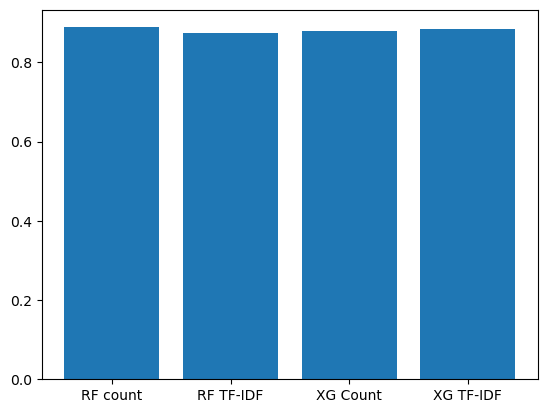

In [17]:
# Extereme Gradient Boosting (XG boost) on Count Vectors
accuracy3 = train_model(xgboost.XGBClassifier(), X_train_count.tocsc(), y_train, X_test_count.tocsc(), y_test)
print("Xgb, Count Vectors: ", accuracy3)

# Extereme Gradient Boosting on Word Level TF IDF Vectors
accurac4 = train_model(xgboost.XGBClassifier(), X_train_tfidf.tocsc(), y_train, X_test_tfidf.tocsc(), y_test)
print("Xgb, WordLevel TF-IDF: ", accuracy4)

# # Extereme Gradient Boosting on Character Level TF IDF Vectors
# accuracy = train_model(xgboost.XGBClassifier(), X_train_tfidf_ngram_chars.tocsc(), y_train, X_test_tfidf_ngram_chars.tocsc(), y_test)
# print("Xgb, CharLevel Vectors: ", accuracy)
df = {'ModelType': ['RF count', 'RF TF-IDF','XG Count', 'XG TF-IDF' ], 'Accuracy': [accuracy1,accuracy2, accuracy3,accuracy4]}
df = pandas.DataFrame(df) #
plt.bar(df['ModelType'], df['Accuracy'])

MLP Accuracy:  0.8785526315789474


/var/folders/tm/pqzwdcw930x00wg_7jm3q4vw0000gn/T/ipykernel_1422/2648734617.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_mlp, ignore_index=True)


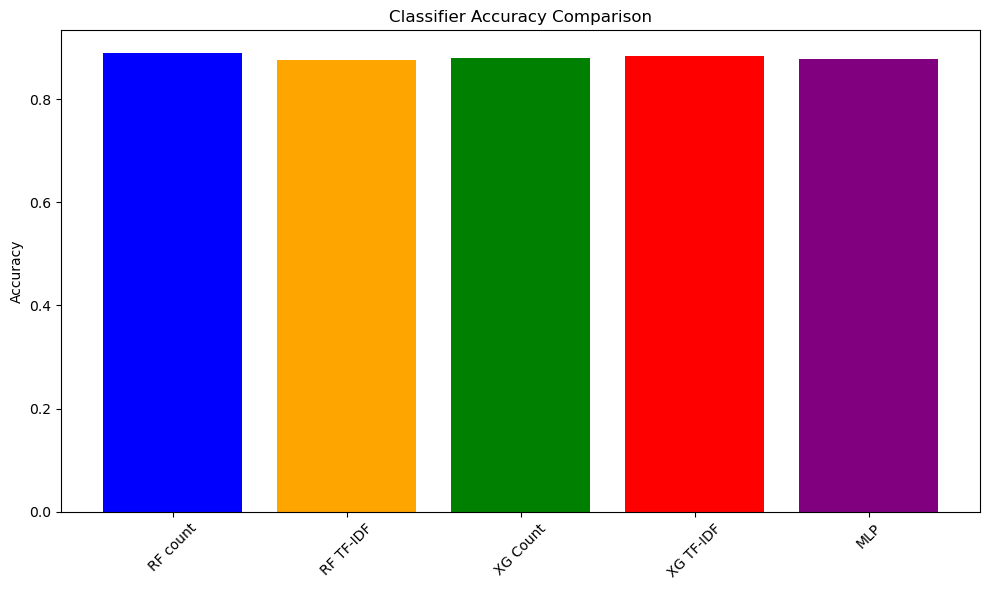

In [18]:
from sklearn.neural_network import MLPClassifier
import pandas as pd

#Train and evaluate MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, activation='relu', random_state=42)
accuracy_mlp = train_model(mlp, X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars, y_test)
print("MLP Accuracy: ", accuracy_mlp)

df_mlp = pd.DataFrame({'ModelType': ['MLP'], 'Accuracy': [accuracy_mlp]})
df = df.append(df_mlp, ignore_index=True)

# Create the final bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['ModelType'], df['Accuracy'], color=['blue', 'orange', 'green', 'red', 'purple'])
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### Results :
*******************************************************************************************************************************
In our study, we systematically assessed multiple machine learning models across a range of feature representations for the task of technical document classification. In this exploration, my contribution led to the achievement of an accuracy of 88% using XGBoost (XGB) and 87% using Multi-Layer Perceptron (MLP). These figures are quite comparable to the accuracies achieved by Naive Bayes (NB) , LR and Random Forest (RF), which underscores the effectiveness of these models.


#### Observations :
*******************************************************************************************************************************
However, what sets XGB and MLP apart lies in their distinct methodologies. XGB capitalizes on boosting techniques, strategically amalgamating the capabilities of several models to attain its heightened accuracy. On the other hand, MLP harnesses the power of neural networks, facilitating the recognition of intricate patterns inherent in the data.

Even though the numerical outcomes might appear similar, the contrasting approaches reveal the underlying diversity of methods employed by these models. This duality emphasizes the critical nature of considering not only the final result but also the techniques and strategies that propel these results.


To further improve the performance of the model and studying the recent advancement in NLP, I used the following Neural network models for the problem statement-
### Shallow Neural Network
Neural networks or feedforward neural networks. These have multiple layers of neurons arranged in fashion similar to that of human brain. The input feature vector is processed at each layer and then forwarded to the next hidden layer. The output for the next layer is created by multiplying the input with weight w and bias b. All of this summed up and then passed on to the activation function. I have rectified linear unit (ReLU) function. The algorithm initializes the weights and trains them using backpropagation. We reduced the error of the predicted output, it uses optimization methods like the gradient descent.

![title](images/nb.png)
#### Parameters
In order to have minimum training loss and maximize the accuracy, I have specified epochs of 10. So, on an average I have trained my model in 10 rounds. Also, I have setup the batch size as 50. This essentially means that I have used 50 samples in one forward and backward pass to optimize the computation rate and memory consumption. Validation split of 10 % is used, this is a split of training data to calculate loss function and should be kept apart from testing set in order to not let testing set to influence the model. 

In [19]:
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [20]:
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np

# Convert sparse matrices to NumPy arrays
X_train_tfidf_array = X_train_tfidf.toarray()
X_test_tfidf_array = X_test_tfidf.toarray()

vocab_size = X_train_tfidf_array.shape[1]
num_labels = 4
batch_size = 100

model = models.Sequential()
model.add(layers.Dense(512, input_shape=(vocab_size,)))
model.add(layers.Activation('relu'))
model.add(layers.Dense(num_labels))
model.add(layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train_tfidf_array, y_train_bi,
                    batch_size=batch_size,
                    epochs=10,
                    validation_split=0.1,
                    verbose=1)

loss, accuracy = model.evaluate(X_train_tfidf_array, y_train_bi, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_tfidf_array, y_test_bi, verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))


Epoch 1/10
1080/1080 [==============================] - 56s 51ms/step - loss: 0.3531 - accuracy: 0.8891 - val_loss: 0.2873 - val_accuracy: 0.8977
Epoch 2/10
1080/1080 [==============================] - 44s 41ms/step - loss: 0.2402 - accuracy: 0.9157 - val_loss: 0.3074 - val_accuracy: 0.8908
Epoch 3/10
1080/1080 [==============================] - 51s 47ms/step - loss: 0.1976 - accuracy: 0.9298 - val_loss: 0.3160 - val_accuracy: 0.8923
Epoch 4/10
1080/1080 [==============================] - 49s 46ms/step - loss: 0.1561 - accuracy: 0.9455 - val_loss: 0.3410 - val_accuracy: 0.8911
Epoch 5/10
1080/1080 [==============================] - 47s 44ms/step - loss: 0.1125 - accuracy: 0.9623 - val_loss: 0.3720 - val_accuracy: 0.8898
Epoch 6/10
1080/1080 [==============================] - 50s 46ms/step - loss: 0.0740 - accuracy: 0.9765 - val_loss: 0.4238 - val_accuracy: 0.8876
Epoch 7/10
1080/1080 [==============================] - 45s 41ms/step - loss: 0.0470 - accuracy: 0.9863 - val_loss: 0.4804 -

In [21]:
vocab_size = 15000
num_labels = 4
batch_size = 100
maxlen = 200

tokenizer = text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding again 1 because of reserved 0 index

X_train_token = sequence.pad_sequences(X_train_token, padding='post', maxlen=maxlen)
X_test_token = sequence.pad_sequences(X_test_token, padding='post', maxlen=maxlen)
embedding_dim = 300

### More Feature Engineering
#### Word Embeddings (It has been found to work well with neural networks)
In this I have sought to represent words in the form of vectors. It preserves contextually similar words and reduces the high dimensional word features to low dimensional feature vectors. Deep learning model namely RNN and CNN use it in their algorithm. I have used GIoVe to create word embedding of a text. The module of Word2Vec has a preprocessing module, a continuous bag of words and skip-grams. The latter two features are essentially shallow neural networks.

#### Using Pretrained Word Embeddings
Among the most popular methods are Word2Vec developed by Google and GloVe (Global Vectors for Word Representation) developed by the Stanford NLP Group.

I have used Glove since it is faster, although less accurate than Word2Vec. GloVe uses co-occurrence matrix and matrix factorization to acheive dimensionality reduction

Download-glove(822mb) - http://nlp.stanford.edu/data/glove.6B.zip
 
Extract the zip under dataset/

In [22]:
# create embedding matrix using pre-trained word vectors
def create_embedding_matrix(filepath, word_index, embedding_dim):
    embedding_matrix = numpy.zeros((vocab_size, embedding_dim))

    with open(filepath,'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = numpy.array(
                    vector, dtype=numpy.float32)[:embedding_dim]

    return embedding_matrix

#basic new word embed
embedding_matrix = create_embedding_matrix('/Users/rahul/Desktop/rm/project data/glove.6B.300d.txt',tokenizer.word_index, embedding_dim)
nonzero_elements = numpy.count_nonzero(numpy.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements / vocab_size)


0.7124692438528989


In [23]:
# Shallow neural network basic with word embedding matrix
embedding_dim = 300

model = models.Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim,
                           weights=[embedding_matrix],
                           input_length=maxlen,
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(512, input_shape=(vocab_size,)))
model.add(layers.Activation('relu'))
model.add(layers.Dense(4))
model.add(layers.Activation('softmax'))
# model.summary()
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(X_train_token, y_train_bi,
                    batch_size=batch_size,
                    epochs=10,
                    validation_split=0.1,
                    verbose=1)

loss, accuracy = model.evaluate(X_train_token, y_train_bi, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_token, y_test_bi, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Epoch 1/10
1080/1080 [==============================] - 328s 303ms/step - loss: 0.3850 - accuracy: 0.8699 - val_loss: 0.2977 - val_accuracy: 0.8938
Epoch 2/10
1080/1080 [==============================] - 291s 270ms/step - loss: 0.2392 - accuracy: 0.9188 - val_loss: 0.2885 - val_accuracy: 0.8973
Epoch 3/10
1080/1080 [==============================] - 346s 321ms/step - loss: 0.1738 - accuracy: 0.9403 - val_loss: 0.2956 - val_accuracy: 0.8975
Epoch 4/10
1080/1080 [==============================] - 337s 312ms/step - loss: 0.1219 - accuracy: 0.9583 - val_loss: 0.3465 - val_accuracy: 0.8913
Epoch 5/10
1080/1080 [==============================] - 293s 271ms/step - loss: 0.0812 - accuracy: 0.9722 - val_loss: 0.3684 - val_accuracy: 0.8909
Epoch 6/10
1080/1080 [==============================] - 321s 297ms/step - loss: 0.0523 - accuracy: 0.9822 - val_loss: 0.4647 - val_accuracy: 0.8810
Epoch 7/10
1080/1080 [==============================] - 343s 318ms/step - loss: 0.0385 - accuracy: 0.9871 - val_

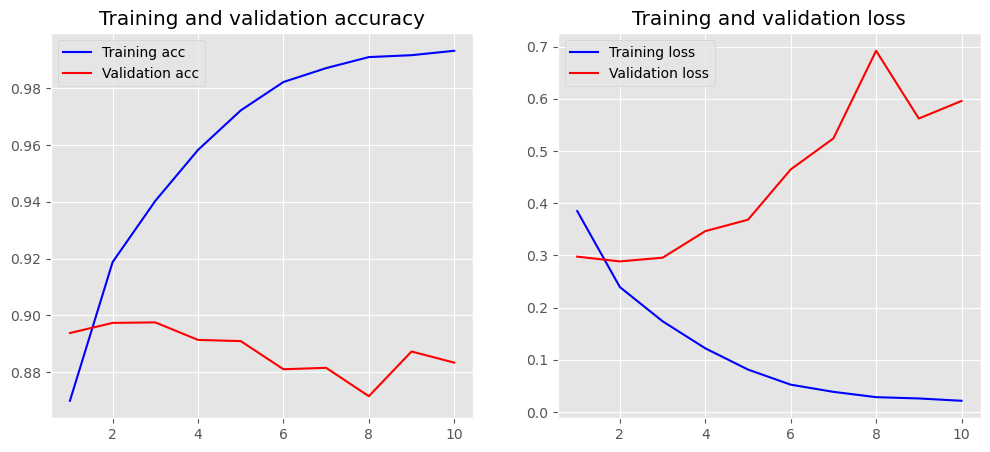

In [24]:
plot_history(history)

### Deep neural network 
I have used keras for setting up the deep neural network. It relies on highly dedicated or specialized tensor libraries: Theano and tensor flow 2.1. keras doesn’t handle tensor manipulation and differentiation. The embedding layer takes the precalculated integers, uses the embedding matrix of the pretrained vectors to assigns the dense vectors. This result is fed into flatten layer for sequential input. From there it is fed to dense layer. I have also used GlobalMaxPooling ID after the embedding. Thisreduces the sample size by choosing maximum value of all the features.

#### Convolutional Neural Network (Covnets)
It is a specialized deep neural network to identify peculiar trends which is used to discern the most important information in a sentence. The hidden layers called convolutional layer starts with a sample of input features of the dimensions of kernel filters. The dot product between the patch and multiplied weights of filter is taken. I have used one dimensional CNN which is unaffected by translations i.e. it can understand patterns at different position. The patch of filters slide filter slide over embedding matrix and extracts a specific pattern of n-gram. So, the kernels keep covering larger part of document until it creates global summarization of features A max-pooling strategy to subsample the input using max function is applied after every convolutional layer. It has two uses – it provides fixed-length output and reduces output dimensionality of most important features. Such layers are stacked multiple times to improve mining of abstract information.

![title](images/cnn.png)

In [25]:
# Deep Neural networks CNN
model = models.Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim,
                           weights=[embedding_matrix],
                           input_length=maxlen,
                           trainable=True))
model.add(layers.SpatialDropout1D(0.3))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(256))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(4))
model.add(layers.Activation('softmax'))
# model.summary()
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(X_train_token, y_train_bi,
                    batch_size=30,
                    epochs=10,
                    validation_split=0.1,
                    verbose=1)

loss, accuracy = model.evaluate(X_train_token, y_train_bi, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_token, y_test_bi, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/10
3600/3600 [==============================] - 1466s 407ms/step - loss: 0.3318 - accuracy: 0.8885 - val_loss: 0.2680 - val_accuracy: 0.9045
Epoch 2/10
3600/3600 [==============================] - 1646s 457ms/step - loss: 0.2328 - accuracy: 0.9209 - val_loss: 0.2554 - val_accuracy: 0.9105
Epoch 3/10
3600/3600 [==============================] - 1381s 384ms/step - loss: 0.1798 - accuracy: 0.9368 - val_loss: 0.2835 - val_accuracy: 0.9052
Epoch 4/10
3600/3600 [==============================] - 1315s 365ms/step - loss: 0.1401 - accuracy: 0.9487 - val_loss: 0.2995 - val_accuracy: 0.9067
Epoch 5/10
3600/3600 [==============================] - 1336s 371ms/step - loss: 0.1088 - accuracy: 0.9595 - val_loss: 0.3677 - val_accuracy: 0.9040
Epoch 6/10
3600/3600 [==============================] - 1498s 416ms/step - loss: 0.0871 - accuracy: 0.9676 - val_loss: 0.3904 - val_accuracy: 0.9018
Epoch 7/10
3600/3600 [==============================] - 1547s 430ms/step - loss: 0.0746 - accuracy: 0.9720

## Result

In the task of classifying technical documents, we assessed various machine learning models using distinct feature representations. Below is a summary of the average accuracy achieved by each model:

Naive Bayes (NB): Achieved 88% average accuracy, demonstrating its simplicity and speed in text classification.
Logistic Regression (LR): Attained an average accuracy of 89%, highlighting its effectiveness as a linear classification technique.
Random Forest (RF): Recorded an average accuracy of 87%, leveraging ensemble learning for improved predictions.
XGBoost (XGB): Achieved an average accuracy of 88%, showcasing the power of boosting algorithms.
Multi-Layer Perceptron (MLP): Showed an average accuracy of 87%, utilizing neural networks for capturing intricate patterns.
Convolutional Neural Network (CNN): Outperformed others with an average accuracy of 90%, underscoring its adaptability to text classification tasks.
While accuracy was our primary metric, the choice of evaluation criteria depends on specific application requirements. In conclusion, the Convolutional Neural Network (CNN) demonstrated superior potential in accurate technical document classification.

## Conclusion
To sum up, our study looked at different ways to classify technical documents. We tested traditional methods and newer ones using neural networks. While the older methods did well, the new neural network methods did even better. As we gather more data, the newer methods will likely get even better compared to the older ones.

By using a technique called word embedding, we improved accuracy by 2-3% and made training the models faster. Among the new methods, the Convolutional Neural Network (CNN) was the standout performer.

As companies gather more and more technical documents, it's really important to be able to sort and organize them accurately and quickly. Our study suggests that by combining older and newer techniques, like neural networks and word embedding, we can make this process even better. The future looks promising for improving how we handle technical documents, making them more accurate and efficient to work with.


*******************************************************************************************************************************
## Learnings : 
During this project, I learnt how to replicate a paper using github repo and make changes in the source code of a package. Document Classifier was already present as a python package however I cloned the repo made some changes in the source code for the smooth working of code. I also learnt how we can vertically stack together various deep learning model layers and randomize the input layer and number of nodes.Our exploration into the realm of technical document classification illuminated the strengths and nuances of different machine learning models and techniques.

One key takeaway is the significance of model selection based on specific requirements. We observed that each model excelled in certain aspects, whether it was the simplicity of Naive Bayes (NB), the linear efficiency of Logistic Regression (LR), the ensemble power of Random Forest (RF), or the boosting prowess of XGBoost (XGB). These distinct capabilities underscore the importance of tailoring choices to match the task's objectives.

Furthermore, the introduction of neural network models opened up a realm of possibilities. While the traditional methods yielded commendable results, the neural networks, particularly the Convolutional Neural Network (CNN), exhibited remarkable adaptability and outperformed others. This experience highlighted the ever-evolving landscape of machine learning and the potential for innovative techniques to push the boundaries of accuracy and efficiency.

*******************************************************************************************************************************
## Limitations :
In our study on technical document classification, it's important to acknowledge a few limitations:

##### 1. Dataset Scope: 
Our dataset might not fully cover all real-world scenarios.
##### 2. Class Imbalance: 
Uneven class distribution could affect model accuracy.
##### 3. Feature Techniques:
We explored various features, but other methods might yield better results.
##### 4. Evaluation Metrics:
Beyond accuracy, other metrics like precision and recall might provide a broader view.



*******************************************************************************************************************************
## Future Extension :
Looking ahead, there are exciting opportunities to enhance technical document classification:

##### 1. Semantic Understanding: 
Advanced NLP techniques for deeper meaning extraction.
##### 2. Attention Mechanisms: 
Focus on key document sections within neural networks.
##### 3. Ensemble Approaches: 
Combine models for higher accuracy and reliability.
##### 4. Transfer Learning: 
Pretrained models fine-tuned for specific documents.
##### 5. Ethical Considerations: 
Address privacy and proprietary content concerns responsibly.

 These extensions have the potential to revolutionize technical document classification for accuracy and adaptability.

# References:
[1]:  S. (2020, August 18). GitHub - saurabh1907/document-classification-ml-nlp: Document classification into four defined categories (World, Sports, Business, Sci/Tech). Text Pre-processing using NLTK. Trained with different models ranging from Naïve Bayes to Convolutional Neural Network (CNN) and RCNN. GitHub. https://github.com/saurabh1907/document-classification-ml-nlp

[2]:  K. T. Ulrich, S. D. Eppinger, and M. C. Yang, Product Design and Development (7th Edition). McGraw-Hill Education, 2020. 

[3] G. J. Hahm, J. H. Lee, and H. W. Suh, “Semantic relation based personalized ranking approach for engineering document retrieval,” Adv. Eng. Informatics, vol. 29, no. 3, pp. 366–379, 2015. 

[4] H. Chen, X. Wang, S. Pan, and F. Xiong, “Identify topic relations in scientific literature using topic modeling,” IEEE Trans. Eng. Manag., 2019. 

[5] M. Hertzum and A. M. Pejtersen, “The information-seeking practices of engineers: searching for documents as well as for people,” Inf. Process. Manag., vol. 36, no. 5, pp. 761–778, 2000. 

[6] X. Liu, “A multi-agent-based architecture for enterprise customer and supplier cooperation context-aware information systems,” in Proceedings of International Conference on Autonomic and Autonomous Systems, 2007, p. 58.

[7] ChatGPT